# 哈希表
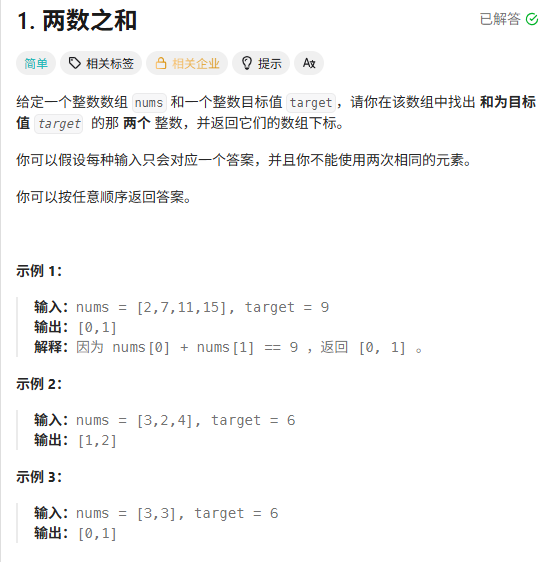  
官方题解：注意到暴力求解方法的时间复杂度较高的原因是寻找 target - x 的时间复杂度过高。因此，我们需要一种更优秀的方法，能够快速寻找数组中是否存在目标元素。如果存在，我们需要找出它的索引。使用哈希表，可以将寻找 target - x 的时间复杂度降低到从 O(N) 降低到 O(1)。这样我们创建一个哈希表，对于每一个 x，我们首先查询哈希表中是否存在 target - x，然后将 x 插入到哈希表中，即可保证不会让 x 和自己匹配。  

In [10]:
from typing import List
class Solution:
    def twoSum(self, nums: List[int], target: int) -> List[int]:
        if not nums: return None
        # 检索下标元素
        for left in range(len(nums)):
            left_value = target - nums[left]
            if left_value in nums and \
            nums.index(left_value) != left:
                return [left, nums.index(left_value)]

# 二叉树
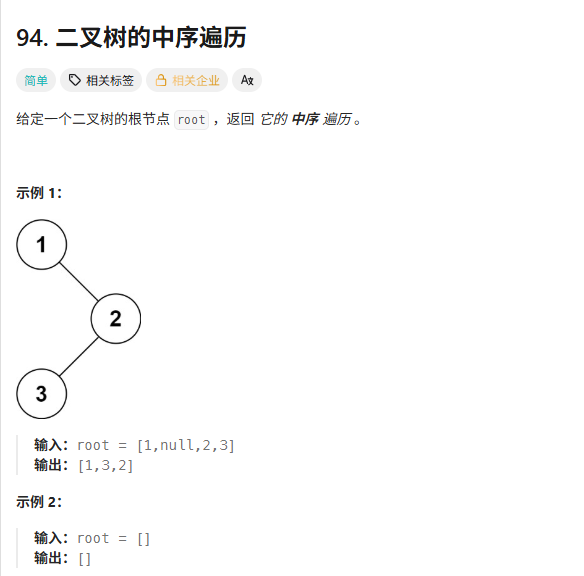

In [28]:
from typing import Optional, List 
class TreeNode:
    """构造根节点"""
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
class Solution:
    """中序遍历-递归实现"""
    def inorderTraversal(self, root: Optional[TreeNode]) -> List[int]:
        result = []
        def inorder(node):
            if node:
                inorder(node.left)
                result.append(node.val)
                inorder(node.right) 
        inorder(root)
        return result
class Solution:
    """中序遍历-迭代实现(使用栈)"""
    def inorderTraversal(self, root: Optional[TreeNode]) -> List[int]:
        result = []
        stack = []
        current = root
        while stack or current:
            while current:
                stack.append(current)
                current = current.left
            current = stack.pop()
            result.append(current.val)
            current = current.right
        return result
def list_to_tree(lst: List[Optional[int]]) -> Optional[TreeNode]:
    """将列表转为树（层序构造）"""
    if not lst: return None
    root = TreeNode(lst[0])
    queue = [root]
    index = 1
    while queue and index < len(lst):
        node = queue.pop(0)
        # 添加左子节点
        if index < len(lst) and lst[index] is not None:
            node.left = TreeNode(lst[index])
            queue.append(node.left)
        index += 1
        # 添加右子节点
        if index < len(lst) and lst[index] is not None:
            node.right = TreeNode(lst[index])
            queue.append(node.right)
        index += 1
    return root

if __name__ == '__main__':
    s = Solution()
    tree_list = [1, 2, 3, 4, 5, None, 8, None, None, 6, 7, 9]
    root = list_to_tree(tree_list)
    print(s.inorderTraversal(root))

[4, 2, 6, 5, 7, 1, 3, 9, 8]


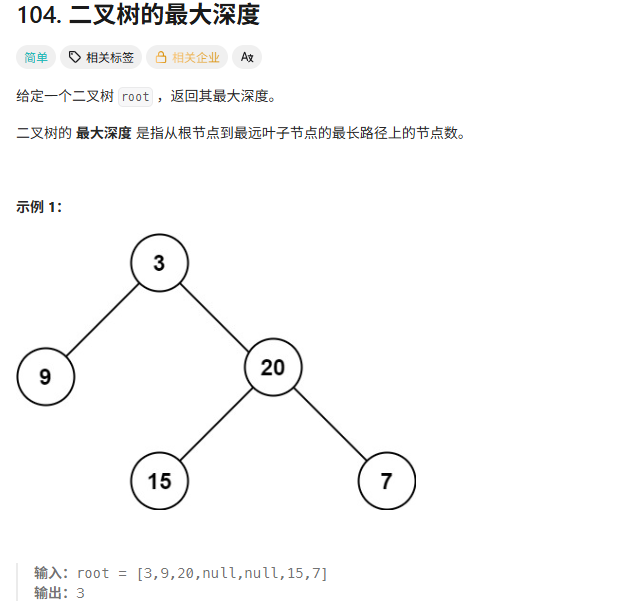

In [33]:
from typing import Optional, List
class TreeNode:
    def __init__(self, val=0,left=None,right=None):
        self.val = val
        self.left = left
        self.right = right
class Solution:
    """使用递归求解最大深度-利用最深节点左右为Null
    分为左、右两侧深度递归求解,并比较最大深度"""
    def maxDepth(self, root: Optional[TreeNode])-> int:
        # 最低端为Null,则返回0
        if not root: return 0
        else:
            left_depth = self.maxDepth(root.left)
            right_depth = self.maxDepth(root.right)
            return max(left_depth, right_depth)+1
    def list_to_tree(self, lst: List[Optional[int]])->Optional[TreeNode]:
        """列表转二叉树"""
        root = TreeNode(lst[0])
        queue = [root]
        index = 1
        while queue and index<len(lst):
            node = queue.pop(0)
            if lst[index] is not None and index<len(lst): # 添加左节点
                node.left = TreeNode(lst[index])
                queue.append(node.left)
            index+=1
            if lst[index] is not None and index<len(lst): # 添加右节点
                node.right = TreeNode(lst[index])
                queue.append(node.right)
            index+=1
        return root
    
if __name__ == '__main__':
    s = Solution()
    tree_list = [3,9,20,None,None,15,7]
    print(s.maxDepth(s.list_to_tree(tree_list)))

3


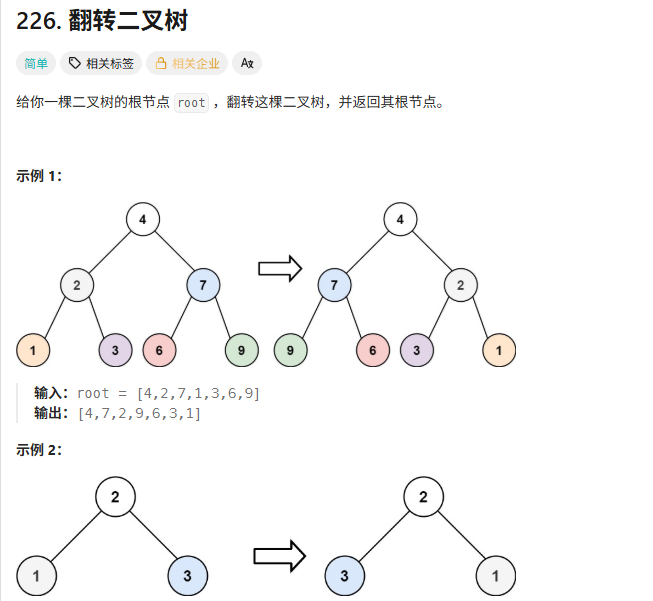

In [40]:
from typing import Optional, List
class TreeNode:
    def __init__(self, val=0,left=None,right=None):
        self.val = val
        self.left = left
        self.right = right
class Solution:
    """迭代思想交换根节点的左右节点"""
    def invertTree(self, root: Optional[TreeNode]) -> Optional[TreeNode]:
        if not root: return #设置出口
        else:
            root.left = self.invertTree(root.right)
            root.right = self.invertTree(root.left)
        return root
    def invertTree(self, root: Optional[TreeNode]) -> Optional[TreeNode]:
        if not root: return #设置出口
        else:
            temp = root.left
            root.left = root.right
            root.right = temp
            self.invertTree(root.left)
            self.invertTree(root.right)
        return root
    def list_to_tree(self, lst: List[Optional[int]])->Optional[TreeNode]:
        """列表转二叉树"""
        root = TreeNode(lst[0])
        queue = [root]
        index = 1
        while queue and index<len(lst):
            node  =queue.pop(0)
            if lst[index] is not None  and index<len(lst):
                node.left = TreeNode(lst[index])
                queue.append(node.left)
            index+=1
            if lst[index] is not None and index<len(lst):
                node.right = TreeNode(lst[index])
                queue.append(node.right)
            index+=1
        return root

if __name__ == '__main__':
    s = Solution()
    tree_list = [4,2,7,1,3,6,9]
    print(s.invertTree(s.list_to_tree(tree_list)))

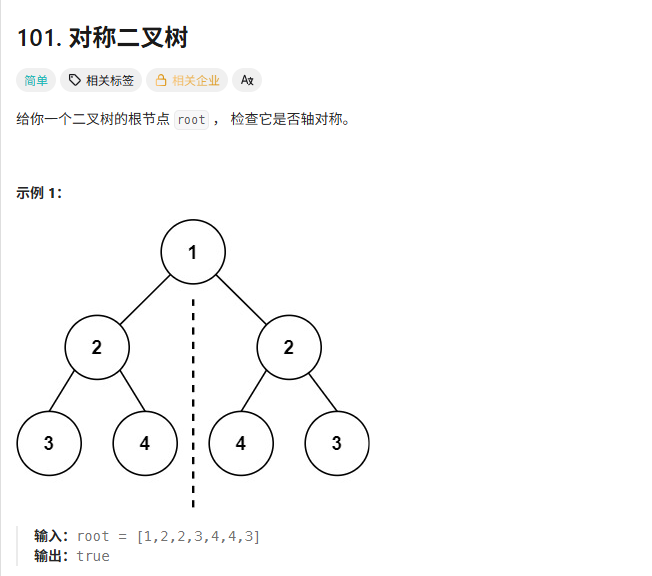  
我们可以实现这样一个递归函数，通过「同步移动」两个指针的方法来遍历这棵树，p 指针和 q 指针一开始都指向这棵树的根，随后 p 右移时，q 左移，p 左移时，q 右移。每次检查当前 p 和 q 节点的值是否相等，如果相等再判断左右子树是否对称。

In [53]:
from typing import Optional, List
class TreeNode:
    def __init__(self, val=0,left=None,right=None):
        self.val = val
        self.left = left
        self.right = right
class Solution:
    """利用迭代遍历实现"""
    def isSymmetric(self, root: Optional[TreeNode]) -> bool:
        if not root: return True
        # 使用条件判断是否为对称节点
        def is_mirror(left:Optional[TreeNode], right:Optional[TreeNode]):
            if not left and not right: return True
            if not left or not right: return False
            # 这里首先判断两父节点是否相同
            # 在判断两组子节点是否相同
            if left.val == right.val:
                return is_mirror(left.left, right.right) and\
                        is_mirror(left.right, right.left)
            else: return False
        return is_mirror(root.left, root.right)
    def list_to_tree(self, lst: List[Optional[int]])->Optional[TreeNode]:
        """列表转二叉树"""
        root = TreeNode(lst[0])
        queue = [root]
        index = 1
        while queue and index<len(lst):
            node  =queue.pop(0)
            if lst[index] is not None  and index<len(lst):
                node.left = TreeNode(lst[index])
                queue.append(node.left)
            index+=1
            if lst[index] is not None and index<len(lst):
                node.right = TreeNode(lst[index])
                queue.append(node.right)
            index+=1
        return root

if __name__ == '__main__':
    s = Solution()
    tree_list = [1,2,2,None,3,None,3]
    print(s.isSymmetric(s.list_to_tree(tree_list)))

False


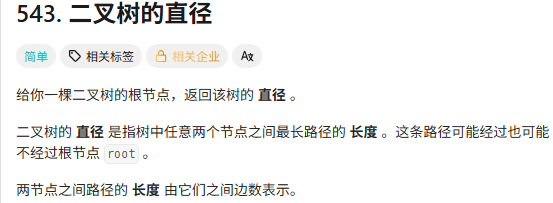  
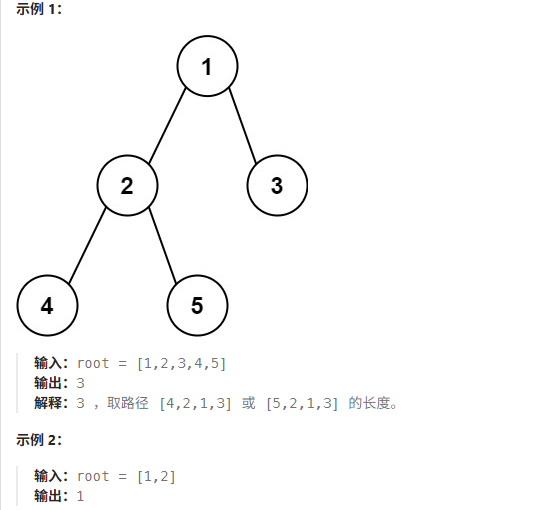  
要计算二叉树的直径，我们需要找到任意两个节点之间的最长路径。这个路径可能经过也可能不经过根节点。为了实现这一点，我们可以使用深度优先搜索（DFS）来计算每个节点的左子树和右子树的最大深度，并在过程中更新全局变量以记录最大直径。递归方法是最直观的解决方案。对于每个节点，我们计算其左子树和右子树的最大深度，并更新全局变量以记录当前的最大直径。具体而言，这个最大直径可以理解为依靠左边最大深度和右边最大深度构建起来的最大直径。

In [67]:
from typing import Optional, List
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
class Solution:
    def diameterOfBinaryTree(self, root: Optional[TreeNode]) -> int:
        if not root: return 0
        # 初始全局变量
        self.max_width = 0
        # 使用DFS递归搜索最大直径
        def dfs(node: TreeNode):
            if not node: return 0
            else:
                left_depth = dfs(node.left)
                right_depth = dfs(node.right)
                # 最大直径更新,注意+1必须正常操作,保证深度正常更新->宽度正常更新
                self.max_width = max(self.max_width, left_depth+right_depth)
                return max(left_depth, right_depth)+1
        max_depth = dfs(root)
        return self.max_width
    def list_to_tree(self, lst: List[int])->Optional[TreeNode]:
        root = TreeNode(lst[0])
        queue = [root]
        index = 1
        while queue and index<len(lst):
            node = queue.pop(0)
            if lst[index] is not None and index<len(lst):
                node.left = TreeNode(lst[index])
                queue.append(node.left)
            index+=1
            if lst[index] is not None and index<len(lst):
                node.right = TreeNode(lst[index])
                queue.append(node.right)
            index+=1
        return root

if __name__ == '__main__':
    s = Solution()
    tree_list = [1,2,3,4,5]
    print(s.diameterOfBinaryTree(s.list_to_tree(tree_list)))

3


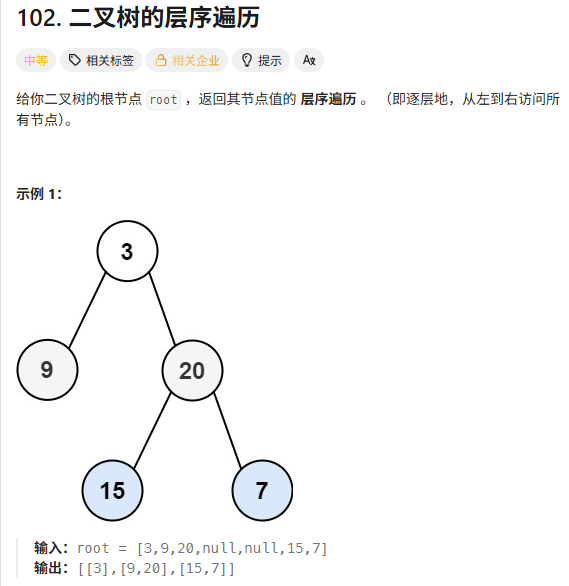

In [ ]:
from typing import Optional, List
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
class Solution:
    def levelOrder(self, root: Optional[TreeNode]) -> List[List[int]]:
        if not root: return []
        
    def list_to_tree(self, lst: List[int])->Optional[TreeNode]:
        root = TreeNode(lst[0])
        queue = [root]
        index = 1
        while queue and index<len(lst):
            node = queue.pop(0)
            if lst[index] is not None and index<len(lst):
                node.left = TreeNode(lst[index])
                queue.append(node.left)
            index+=1
            if lst[index] is not None and index<len(lst):
                node.right = TreeNode(lst[index])
                queue.append(node.right)
            index+=1
        return root

if __name__ == '__main__':
    s = Solution()
    tree_list = [1,2,3,4,5]
    print(s.diameterOfBinaryTree(s.list_to_tree(tree_list)))